## Apriori algorithm and Association rules

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

sys.path.append('./modules')
from modules.visual import *

In [2]:
# Load data
pageviews = pd.read_csv('./../databases/csv-data/cleaned.csv', 
                        parse_dates=['datetime'])[['uid', 'page', 'pageURL', 'datetime']]
# Create a column ranking pageview sequence
pageviews['pageview_sequence'] = pageviews.groupby(['uid'])['datetime'].rank(method='first')
pageviews.dropna(inplace=True)

In [3]:
def get_pageviews_list(df):
    pageviews_list = []
    for uid in df.uid.unique():
        temp = df[df['uid'] == uid].sort_values(by='pageview_sequence')
        pageviews_list.append(list(temp.page.values))
    return pageviews_list

In [4]:
pageviews_list = get_pageviews_list(pageviews)

In [5]:
pageviews_list[:5]

[['If caught with drugs - The Mix'],
 ['Taking someone to small claims court - The Mix',
  'Being taken to small claims court - The Mix'],
 ['Fingering a girl - TheMix.org.uk',
  'Why does she bleed when I finger her? - TheMix.org.uk'],
 ['General chit chat (OP GreenTea) - Page 542 — The Mix Support Community',
  'The Mix Community',
  'Speak to Our Team - The Mix',
  'The Mix Counselling Service - The Mix',
  'Thank you - The Mix'],
 ['The Mix Counselling Service - The Mix',
  'Get Support - The Mix',
  'Launching: The Kindness Diary - The Mix']]

In [6]:
# Instantiate encoder and identify unique items
encoder = TransactionEncoder().fit(pageviews_list)

# One-hot encode transactions
onehot = encoder.transform(pageviews_list)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns=encoder.columns_)

In [7]:
frequent_itemsets = apriori(onehot, min_support=0.02, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.00)

In [8]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(About Us - The Mix),(The Mix - Essential support for under 25s),0.034800,0.313033,0.029219,0.839623,2.682213,0.018325,4.283438
1,(The Mix - Essential support for under 25s),(About Us - The Mix),0.313033,0.034800,0.029219,0.093340,2.682213,0.018325,1.064567
2,(Anything Goes — The Mix Support Community),(Health & Wellbeing — The Mix Support Community),0.043500,0.048260,0.024458,0.562264,11.650725,0.022359,2.174234
3,(Health & Wellbeing — The Mix Support Community),(Anything Goes — The Mix Support Community),0.048260,0.043500,0.024458,0.506803,11.650725,0.022359,1.939387
4,(The Mix Community),(Anything Goes — The Mix Support Community),0.123441,0.043500,0.037919,0.307181,7.061682,0.032549,1.380592


Figure saved, heatmap


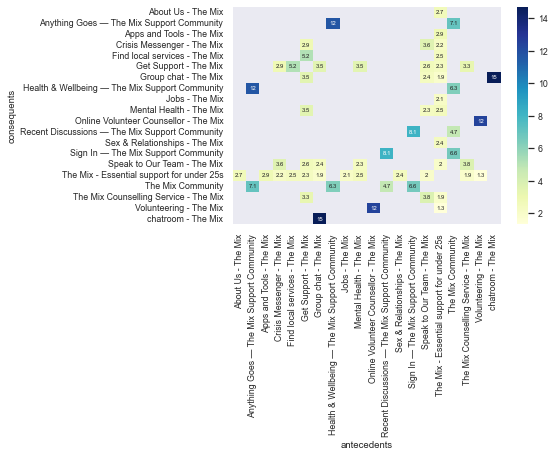

In [9]:
# Replace frozen sets with strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform data to matrix format and generate heatmap
pivot = rules.pivot_table(index='consequents', columns='antecedents', values='lift')

sns.set(font_scale=0.8)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, annot_kws={"fontsize":6})
# Format and display plot
plt.yticks(rotation=0)
save_fig('heatmap')
plt.show()

In [10]:
frequent_itemsets = apriori(onehot, min_support=0.02, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=2.5)

In [11]:
# Convert rules to coordinates. 
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0]) 
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0]) 
rules['rule'] = rules.index 

In [12]:
# Define coordinates and label
coords = rules[['antecedent','consequent','rule']] 
coords.head()

,antecedent,consequent,rule
0,About Us - The Mix,The Mix - Essential support for under 25s,0
1,The Mix - Essential support for under 25s,About Us - The Mix,1
2,Anything Goes — The Mix Support Community,Health & Wellbeing — The Mix Support Community,2
3,Health & Wellbeing — The Mix Support Community,Anything Goes — The Mix Support Community,3
4,The Mix Community,Anything Goes — The Mix Support Community,4


Figure saved, parallel


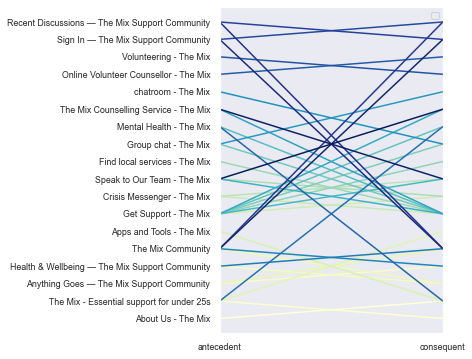

In [13]:
plt.figure(figsize=(4,6))
parallel_coordinates(coords, 'rule', colormap='YlGnBu',)
plt.legend([])
save_fig('parallel')
plt.show()